In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# extracción de datos

In [12]:
path = "/home/ernesteins/Documents/Introduccion-al-desarrollo-web/yaselga-moreira-ernesto-daniel/FormulaProject/F1"

circuits =  pd.read_csv(path+'/circuits.csv',index_col="circuitId")
constructorResults =  pd.read_csv(path+'/constructorResults.csv',index_col="constructorResultsId")
constructors =  pd.read_csv(path+'/constructors.csv',index_col="constructorId")
constructorStandings =  pd.read_csv(path+'/constructorStandings.csv',index_col="constructorStandingsId")
drivers =  pd.read_csv(path+'/drivers.csv',index_col="driverId")
driverStandings =  pd.read_csv(path+'/driverStandings.csv',index_col="driverStandingsId")
lapTimes =  pd.read_csv(path+'/lapTimes.csv',index_col="raceId")
pitStops =  pd.read_csv(path+'/pitStops.csv',index_col="raceId")
qualifying =  pd.read_csv(path+'/qualifying.csv',index_col="qualifyId")
races =  pd.read_csv(path+'/races.csv',index_col="raceId")
results =  pd.read_csv(path+'/results.csv',index_col="resultId")
seasons =  pd.read_csv(path+'/seasons.csv')
status =  pd.read_csv(path+'/status.csv',index_col="statusId")


### CUÁNTOS CIRCUITOS DE LA F1 HAN HABIDO A LO LARGO DE LOS TIEMPOS

In [21]:
print ("Han existido un total de: ",circuits["name"].size," circuitos a lo largo de la historia de la F1")
print (circuits["name"])

Han existido un total de:  73  circuitos a lo largo de la historia de la F1
circuitId
1      Albert Park Grand Prix Circuit
2        Sepang International Circuit
3       Bahrain International Circuit
4      Circuit de Barcelona-Catalunya
5                       Istanbul Park
6                   Circuit de Monaco
7           Circuit Gilles Villeneuve
8       Circuit de Nevers Magny-Cours
9                 Silverstone Circuit
10                     Hockenheimring
11                        Hungaroring
12            Valencia Street Circuit
13       Circuit de Spa-Francorchamps
14       Autodromo Nazionale di Monza
15          Marina Bay Street Circuit
16                      Fuji Speedway
17     Shanghai International Circuit
18         Autodromo Jose Carlos Pace
19        Indianapolis Motor Speedway
20                        nurburgring
21      Autodromo Enzo e Dino Ferrari
22                     Suzuka Circuit
23                            A1-Ring
24                 Yas Marina Circuit
25

### CIRCUITOS POR PAIS

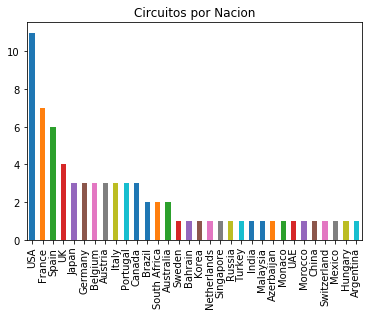

In [23]:
plt.title("Circuitos por Nacion"),
circuits['country'].value_counts().plot(kind='bar')
plt.show()

### HAN EXISTIDO MÁS PILOTOS DE NACIONES EUROPEAS

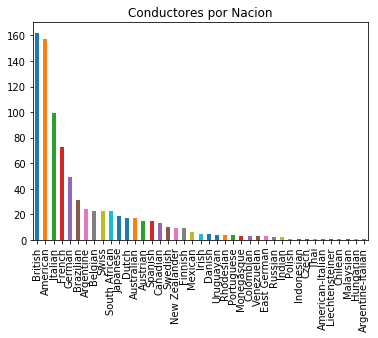

In [25]:
plt.title("Conductores por Nacion"),
drivers['nationality'].value_counts().plot(kind='bar')

### EL PAÍS QUE MÁS ESCUDERÍAS HA PRESENTADO ES EUROPEO

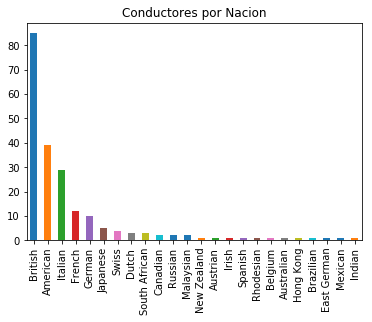

In [26]:
plt.title("Conductores por Nacion"),
constructors['nationality'].value_counts().plot(kind='bar')

### ANTES SE CORRÍAN MENOS CARRERAS POR AÑO

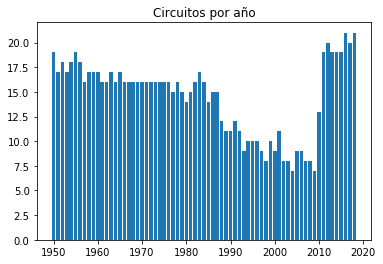

In [27]:
plt.title("Circuitos por año")
plt.bar(races['year'].unique(),
        races['year'].value_counts(False,False))
plt.show()

### PIT-STOP MÁS RAPIDOS POR CIRCUITO

In [28]:
races_pitStop = pd.concat([races, pitStops], axis=1, join_axes=[pitStops.index])
races_pitStop[['milliseconds',
               'name',
               'date']].sort_values(by = 'milliseconds').groupby('name').min()


,milliseconds,date
name,,
Abu Dhabi Grand Prix,12897,2011-11-13
Australian Grand Prix,16867,2011-03-27
Austrian Grand Prix,16139,2014-06-22
Azerbaijan Grand Prix,14943,2017-06-25
Bahrain Grand Prix,18989,2012-04-22
Belgian Grand Prix,13914,2011-08-28
Brazilian Grand Prix,14029,2011-11-27
British Grand Prix,22895,2011-07-10
Canadian Grand Prix,14446,2011-06-12


### TOP 10 PIT-STOP MÁS RÁPIDOS

In [29]:
races_pitStop[['milliseconds',
               'name',
               'date']].sort_values(by = 'milliseconds').head(10)

,milliseconds,name,date
raceId,,,
858,12897,Abu Dhabi Grand Prix,2011-11-13
858,12959,Abu Dhabi Grand Prix,2011-11-13
851,13173,Hungarian Grand Prix,2011-07-31
851,13186,Hungarian Grand Prix,2011-07-31
870,13199,Hungarian Grand Prix,2012-07-29
851,13201,Hungarian Grand Prix,2011-07-31
870,13206,Hungarian Grand Prix,2012-07-29
864,13259,Spanish Grand Prix,2012-05-13
884,13266,Spanish Grand Prix,2013-05-12


### LOS CORREDORES DE LA ERA HÍBRIDA TIENEN LAS VUELTAS MÁS RÁPIDAS POR EL DESARROLLO MODERNO DE LOS F1

In [31]:
laps_drivers = lapTimes.join(drivers,"driverId")
laps_drivers["milliseconds"] = laps_drivers["milliseconds"]/(1000*60)
laps_drivers.rename(columns={"milliseconds":"minutos"},inplace = True)

laps_drivers[["minutos","driverRef"]].sort_values(by = 'minutos').head(20)

,minutos,driverRef
raceId,,
977,1.123517,hamilton
977,1.123733,hamilton
977,1.124033,ricciardo
977,1.124767,raikkonen
977,1.124933,vettel
977,1.125050,hamilton
977,1.125183,hamilton
977,1.125633,raikkonen
977,1.125717,hamilton


## LAS VUELTAS MÁS RAPIDAS (EN CARRERA) SIEMPRE FUERON AL FINAL DE LA CARRERA


In [32]:
laps_drivers[["minutos","lap"]].sort_values(by = 'minutos').head(20)

,minutos,lap
raceId,,
977,1.123517,69
977,1.123733,65
977,1.124033,69
977,1.124767,68
977,1.124933,69
977,1.125050,68
977,1.125183,61
977,1.125633,64
977,1.125717,67
